In [91]:
# import necessary packages for geospatial analysis and data processing
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import mapclassify as mc

print("Packages imported successfully!")

Packages imported successfully!


# NYS Map

In [92]:
map_data = gpd.read_file('./NY_Waterbody_List.geojson')
map_data = GeoDataFrame(map_data)

map_data.set_crs(epsg=4326, inplace=True)
map_data

,OBJECTID,PWL_ID,NAME,DESCRIPT,BASIN,FACT_SHEET,SHAPE_Length,SHAPE_Area,geometry
0,1,0301-0043,Lyndonville Reservoir,entire reservoir,Lake Ontario,https://www.dec.ny.gov/data/WQP/PWL/0301-0043.pdf,0.015856,0.000006,"MULTIPOLYGON (((-78.38929 43.32251, -78.38925 ..."
1,2,0301-0047,Middleport Reservoir,entire reservoir,Lake Ontario,https://www.dec.ny.gov/data/WQP/PWL/0301-0047.pdf,0.009788,0.000003,"MULTIPOLYGON (((-78.47488 43.19064, -78.47483 ..."
2,3,0302-0001,Irondequoit Bay,entire bay,Lake Ontario,https://www.dec.ny.gov/data/WQP/PWL/0302-0001....,0.299554,0.000744,"MULTIPOLYGON (((-77.51777 43.23899, -77.51773 ..."
3,4,0302-0011,East Bay,entire bay,Lake Ontario,https://www.dec.ny.gov/data/WQP/PWL/0302-0011....,0.105549,0.000072,"MULTIPOLYGON (((-76.88962 43.28737, -76.88976 ..."
4,5,0302-0012,Port Bay,entire bay,Lake Ontario,https://www.dec.ny.gov/data/WQP/PWL/0302-0012....,0.125191,0.000207,"MULTIPOLYGON (((-76.83266 43.30427, -76.83271 ..."
...,...,...,...,...,...,...,...,...,...
2091,2092,1301-0173,"Bog Meadow Pond, Jims Pond",total area of both lakes,Lower Hudson River,https://www.dec.ny.gov/data/WQP/PWL/1301-0173....,0.058966,0.000024,"MULTIPOLYGON (((-74.01137 41.39300, -74.01136 ..."
2092,2093,1701-0311,Unnamed (Eastport) Pond,entire pond,Atlantic-Long Island Sound,https://www.dec.ny.gov/data/WQP/PWL/1701-0311.pdf,0.025037,0.000012,"MULTIPOLYGON (((-72.72531 40.83211, -72.72545 ..."
2093,2094,1701-0258,Merritts Pond,entire lake,Atlantic-Long Island Sound,https://www.dec.ny.gov/data/WQP/PWL/1701-0258.pdf,0.018157,0.000007,"MULTIPOLYGON (((-72.66604 40.92863, -72.66605 ..."
2094,2095,1702-0105,The Lake in Central Park,entire lake,Atlantic-Long Island Sound,https://www.dec.ny.gov/data/WQP/PWL/1702-0105....,0.021927,0.000006,"MULTIPOLYGON (((-73.97230 40.77838, -73.97220 ..."


# Confirmed Nests

In [93]:
nests = pd.read_csv("./confirmed_osprey_nests.csv")

#Convert pandas DataFrame to GeoDataFrame
geometry = [Point(xy) for xy in zip(nests.faultlongitude, nests.faultlatitude)]
nests_gdf = GeoDataFrame(nests, crs=4326, geometry=geometry)

Text(0.5, 1.0, '131 Field Confirmed Osprey Nests')

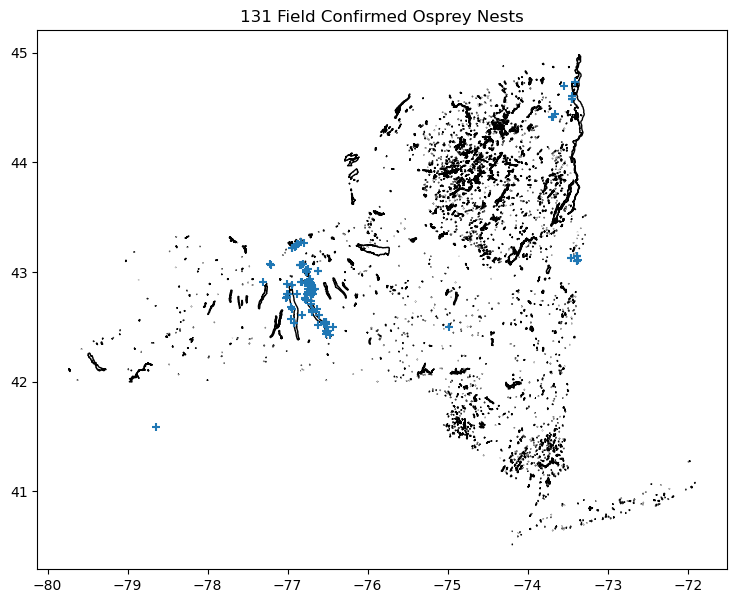

In [94]:
# fig = plt.subplots(subplot_kw={'aspect':'equal'}) # figsize=(12,10)
base = map_data.plot(color='white', edgecolor='black', figsize=(10,7))
nests_gdf.plot(marker = "+", k=5, legend=True, ax=base)
plt.title("131 Field Confirmed Osprey Nests")

In [95]:
nests = nests_gdf.loc[
    (nests_gdf["faultlongitude"] >= -77)
    & (nests_gdf["faultlongitude"] <= -76.6)
    & (nests_gdf["faultlatitude"] >= 42.34)
    & (nests_gdf["faultlatitude"] <= 43.1)
]
nests

,Substation,Circuit,Line,Pole,Town,CustomerCount,OPCO,faultlatitude,faultlongitude,Activity,ID,Type,Condition,CorrectiveAction,Closest Address,Comments,KeyCustomers,geometry
3,Hammondsport,243,2548,9-1,Lodi,-,NEST-NYSEG,42.608869,-76.824791,Active,Osprey,No Box,Needs Box,Needs Box,"8568 S. Main Street, Lodi, NY 14860","*Sticks falling onto transformers, Auburn/Gene...",NaN,POINT (-76.82479 42.60887)
4,Interlaken,705,1051,69A,Interlaken,-,NEST-NYSEG,42.638963,-76.698967,Active,Osprey,No Box,Needs Box,Needs Box,"3965 Deerlick Springs Road, Interlaken, NY 14847",NaN,NaN,POINT (-76.69897 42.63896)
5,Transmission,"Transmission, Penn Yan",596,14A,Penn Yan,-,NEST-NYSEG,42.678103,-76.958777,Active,Osprey,No Box,Needs Box,Needs Box,"2020 Swarthout Road, Penn Yan, NY 14527","Transmission line, coordinates are across the ...",NaN,POINT (-76.95878 42.67810)
6,Aurora,707,A232,4,Aurora,-,NEST-NYSEG,42.734471,-76.705390,Active,Osprey,No Box,Needs Box,Needs Box,"2438 Lake Road, Aurora, NY, 13026",NaN,NaN,POINT (-76.70539 42.73447)
10,UNK-Romulus,-,-,-,Romulus,-,NEST-NYSEG,42.801309,-76.879119,Active,Osprey,No Box,Needs Box,Needs Box,"4604 McGrane Road, Romulus, NY 14541",*Location on a farm tower,NaN,POINT (-76.87912 42.80131)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Non-Utility Location,-,-,-,Clyde,-,NEST-RGE,43.064587,-76.845111,Active,Osprey,-,-,-,"11144 Hwy 31, Clyde, NY 14433",On Farm Equipment,NaN,POINT (-76.84511 43.06459)
115,Non-Utility Location,-,-,-,Clyde,-,NEST-RGE,43.066480,-76.832220,Active,Osprey,-,-,-,"11612 Hwy 31, Clyde, NY 14433",On Farm Equipment,NaN,POINT (-76.83222 43.06648)
116,Non-Utility Location,-,-,-,Galen,-,NEST-NYSEG,43.066480,-76.832220,Active,Osprey,No Box,-,-,"11607 NY 31, Galen, NY, 14433",Farm Equipment,NaN,POINT (-76.83222 43.06648)
118,Clyde,199,708,341,Clyde,-,NEST-RGE,43.068280,-76.813960,Active,Osprey,Direct Mount,Good Condition,Maintain,"11699 New York Route 31, Clyde NY 14433",NaN,NaN,POINT (-76.81396 43.06828)


In [96]:
print(max(nests["faultlatitude"]))
print(min(nests["faultlatitude"]))
print(max(nests["faultlongitude"]))
print(min(nests["faultlongitude"]))
nests_gdf["OPCO"].unique()

43.068531
42.51694
-76.612392
-76.958777


array(['NEST-NYSEG', 'NEST-RGE'], dtype=object)

# Isolate Animal/Bird Contact Outages

In [97]:
# distance of ALL NYS outages to waterbody
distance = pd.read_csv("./nys_outage_waterbody_distances.csv", index_col = 0)
distance = distance.dropna()
distance = distance.drop_duplicates()
distance

,OPCO,CustomerCount,CircuitVoltage,Division,CauseDesc,faultlatitude,faultlongitude,geometry,nearest_waterbody_idx,nearest_waterbody_distance_km
2,NYSEG,26,4800.0,Liberty,Pole Damage/Failure - Tree Outside ROW,41.605574,-74.734750,POINT (-74.73475 41.605574),1327,1.696401
3,NYSEG,1,4800.0,Liberty,Conductor Down - Tree Outside ROW,41.844256,-74.801340,POINT (-74.80134 41.844256),1356,2.655544
4,NYSEG,16,12470.0,Oneonta,Conductor Down - Tree Inside ROW,42.038159,-75.299120,POINT (-75.29912 42.038159),1591,2.847123
8,NYSEG,130,4800.0,Hornell,Animal - Bird Contact,42.553013,-77.723435,POINT (-77.723435 42.553013),165,17.313512
12,NYSEG,1,2400.0,Lockport,Other - Pre Arranged,43.154048,-78.682774,POINT (-78.682774 43.154048),1,23.364983
...,...,...,...,...,...,...,...,...,...,...
176915,RGE,56,12470.0,Central,Tree/Branch on Conductor Inside ROW,43.068282,-77.580587,POINT (-77.580587 43.068282),48,4.702441
176923,RGE,2,12470.0,Central,Animal - Squirrel Contact,43.144830,-77.456874,POINT (-77.456874 43.14483),2,10.520434
176974,RGE,18,34500.0,Fillmore,OH Transformer Failure,42.193723,-78.058460,POINT (-78.05846 42.193723),76,8.487308
176981,RGE,30,12470.0,Sodus,Animal - Squirrel Contact,43.291653,-76.613531,POINT (-76.613531 43.291653),57,8.075796


In [98]:
osprey_nests = pd.read_excel('Osprey Data, Confirmed Nests as of 8.2.2023.xlsx', sheet_name='Outages, 2018-Current')
# osprey_nests = osprey_nests.dropna()
osprey_nests = osprey_nests.drop_duplicates()
osprey_nests

,CauseDesc,Substation,Circuit,FaultLinePole,FaultPole,Division,CustomerCount,OPCO,faultlatitude,faultlongitude,WeatherDesc,ID,YYYY,MalfStartDate,CorrectiveAction,FaultRoad,Comments,KeyCustomers
0,Animal - Bird Contact,OUAQUAGA WEST,8105601,2065-48-4,48-4,Binghamton,17.0,NYSEG,42.121093,-75.740825,Clear,22232091.0,2023.0,2023-07-19,NaN,2065,NaN,NaN
1,Animal - Bird Contact,56,0056RO5305,HILLTOP DR-5S,5S,Central,7.0,RGE,43.078867,-77.517980,Clear,22239213.0,2023.0,2023-07-18,NaN,HILLTOP DR,Device_Text: XMFR off p-5s hilltop dr Comme...,NaN
2,Animal - Bird Contact,LYONS,4200503,L400-11-2,2023-11-02 00:00:00,Geneva,23.0,NYSEG,43.105887,-77.005098,Clear,22230027.0,2023.0,2023-07-18,NaN,L400,NaN,NaN
3,Animal - Bird Contact,STOLLE RD.,3104101,513-236-1,236-1,Lancaster,1.0,NYSEG,42.841644,-78.576785,Clear,22229201.0,2023.0,2023-07-17,NaN,513,NaN,NaN
4,Animal - Bird Contact,MILFORD,2301327,825-25-4,25-4,Oneonta,3.0,NYSEG,42.604576,-74.894697,Clear,22229106.0,2023.0,2023-07-16,NaN,825,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11013,Bird Contact,WATER ST,1531,NaN,5184,UI,1.0,UI,41.291363,-72.940932,Fair,3632118.0,2011.0,2011-11-26,REPAIRED,CEDAR,NaN,NaN
11014,Animal - Bird Contact,428,0428CF5138,BRICKYARD RD-T-36,T-36,Canandaigua,1.0,RGE,42.919738,-77.324119,Clear,1324068.0,2018.0,2018-01-11,NaN,BRICKYARD RD,Device_Text: Transformer Off P-T-36 Brickyard...,NaN
11015,Animal - Bird Contact,428,0428CF5138,BRICKYARD RD-T-36,T-36,Canandaigua,1.0,RGE,42.919738,-77.324119,Clear,1331302.0,2018.0,2018-01-11,NaN,BRICKYARD RD,Device_Text: Transformer Off P-T-36 Brickyard...,NaN
11016,Animal - Bird Contact,DANNEMORA,1502244,946-P9 fuse,P9 fuse,Plattsburgh,42.0,NYSEG,43.171213,-77.719802,Clear,1321263.0,2018.0,2018-01-10,NaN,946,Device_Text: L946 P9 ...,NaN


In [99]:
osprey_nests = osprey_nests[['CauseDesc', 'Division', 'OPCO','faultlatitude','faultlongitude', "CustomerCount"]]
osprey_nests = osprey_nests.dropna()
osprey_nests = osprey_nests.drop_duplicates()
osprey_nests

,CauseDesc,Division,OPCO,faultlatitude,faultlongitude,CustomerCount
0,Animal - Bird Contact,Binghamton,NYSEG,42.121093,-75.740825,17.0
1,Animal - Bird Contact,Central,RGE,43.078867,-77.517980,7.0
2,Animal - Bird Contact,Geneva,NYSEG,43.105887,-77.005098,23.0
3,Animal - Bird Contact,Lancaster,NYSEG,42.841644,-78.576785,1.0
4,Animal - Bird Contact,Oneonta,NYSEG,42.604576,-74.894697,3.0
...,...,...,...,...,...,...
11012,Bird Contact,UI,UI,41.291363,-72.940932,2267.0
11013,Bird Contact,UI,UI,41.291363,-72.940932,1.0
11014,Animal - Bird Contact,Canandaigua,RGE,42.919738,-77.324119,1.0
11016,Animal - Bird Contact,Plattsburgh,NYSEG,43.171213,-77.719802,42.0


In [100]:
new = osprey_nests.merge(distance, on = ['CauseDesc', 'Division', 'OPCO','faultlatitude','faultlongitude', "CustomerCount"], how = 'left')
osprey_nests = new.dropna()
osprey_nests

,CauseDesc,Division,OPCO,faultlatitude,faultlongitude,CustomerCount,CircuitVoltage,geometry,nearest_waterbody_idx,nearest_waterbody_distance_km
0,Animal - Bird Contact,Binghamton,NYSEG,42.121093,-75.740825,17.0,4800.0,POINT (-75.740825 42.121093),96.0,1.912343
1,Animal - Bird Contact,Central,RGE,43.078867,-77.517980,7.0,12470.0,POINT (-77.51798 43.078867),37.0,5.291268
2,Animal - Bird Contact,Geneva,NYSEG,43.105887,-77.005098,23.0,4800.0,POINT (-77.005098 43.105887),99.0,8.001346
3,Animal - Bird Contact,Lancaster,NYSEG,42.841644,-78.576785,1.0,4800.0,POINT (-78.576785 42.841644),13.0,18.699584
4,Animal - Bird Contact,Oneonta,NYSEG,42.604576,-74.894697,3.0,4800.0,POINT (-74.894697 42.604576),206.0,6.006427
...,...,...,...,...,...,...,...,...,...,...
6313,Animal - Bird Contact,Geneva,NYSEG,43.098016,-77.087981,2.0,34500.0,POINT (-77.087981 43.098016),99.0,6.894273
6314,Animal - Bird Contact,Brewster,NYSEG,41.199682,-73.629207,7.0,13200.0,POINT (-73.629207 41.199682),2085.0,3.556718
6315,Animal - Bird Contact,Brewster,NYSEG,41.352407,-73.746470,1.0,13200.0,POINT (-73.74647 41.352407),1674.0,1.938310
7405,Animal - Bird Contact,Central,RGE,43.240298,-77.667936,5.0,12470.0,POINT (-77.667936 43.240298),83.0,4.405277


In [101]:
geometry = [Point(xy) for xy in zip(osprey_nests.faultlongitude, osprey_nests.faultlatitude)]
crs = {'init': 'epsg:4326'}
osprey_nests_gdf = GeoDataFrame(osprey_nests, crs=crs, geometry=geometry)

/Users/ZhongxuanChen/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Text(0.5, 1.0, 'NYS Outages Due to Bird Contacts: \n Colored by Distance to Nearest Water Body')

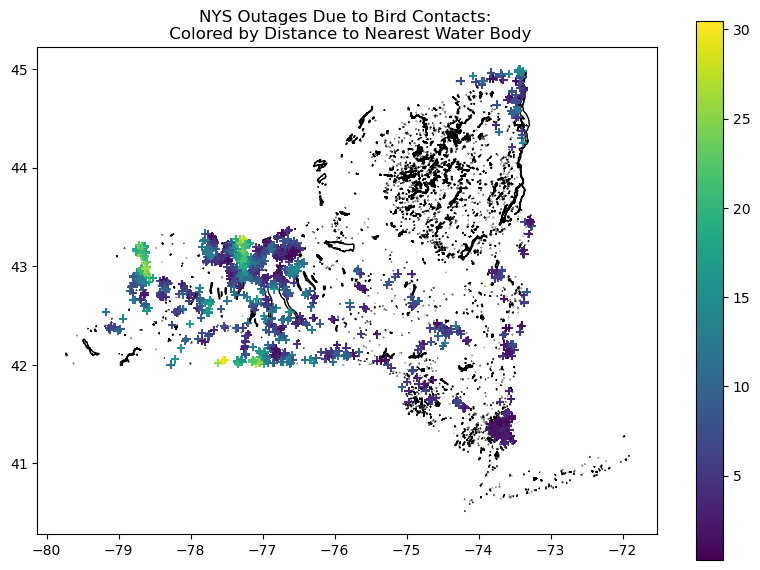

In [102]:
# fig = plt.subplots(subplot_kw={'aspect':'equal'}) # figsize=(12,10)
base = map_data.plot(color='white', edgecolor='black', figsize=(10,7))
osprey_nests_gdf.plot(marker = "+", column='nearest_waterbody_distance_km', k=5, legend=True, ax=base)
plt.title("NYS Outages Due to Bird Contacts: \n Colored by Distance to Nearest Water Body")

# Filter just the finger lakes region

In [103]:
osprey_nests_gdf = osprey_nests_gdf.loc[
    (osprey_nests_gdf["faultlongitude"] >= -77)
    & (osprey_nests_gdf["faultlongitude"] <= -76.6)
    & (osprey_nests_gdf["faultlatitude"] >= 42.34)
    & (osprey_nests_gdf["faultlatitude"] <= 43.1)
]
osprey_nests_gdf

,CauseDesc,Division,OPCO,faultlatitude,faultlongitude,CustomerCount,CircuitVoltage,geometry,nearest_waterbody_idx,nearest_waterbody_distance_km
39,Animal - Bird Contact,Geneva,NYSEG,42.845515,-76.995359,4.0,4800.0,POINT (-76.99536 42.84551),383.0,4.115398
44,Animal - Bird Contact,Geneva,NYSEG,42.940546,-76.771364,19.0,4800.0,POINT (-76.77136 42.94055),290.0,3.763633
46,Animal - Bird Contact,Auburn,NYSEG,42.712953,-76.659769,4.0,4800.0,POINT (-76.65977 42.71295),339.0,5.686334
60,Animal - Bird Contact,Sodus,RGE,43.078599,-76.625567,16.0,12470.0,POINT (-76.62557 43.07860),275.0,1.753066
96,Animal - Bird Contact,Geneva,NYSEG,42.854254,-76.735058,75.0,4800.0,POINT (-76.73506 42.85425),382.0,1.405215
...,...,...,...,...,...,...,...,...,...,...
6286,Animal - Bird Contact,Auburn,NYSEG,42.851145,-76.687716,19.0,4800.0,POINT (-76.68772 42.85115),382.0,4.239697
6291,Animal - Bird Contact,Geneva,NYSEG,42.666487,-76.946402,1.0,34500.0,POINT (-76.94640 42.66649),381.0,4.318541
6292,Animal - Bird Contact,Geneva,NYSEG,42.878069,-76.800924,11.0,12470.0,POINT (-76.80092 42.87807),290.0,4.036047
6298,Animal - Bird Contact,Sodus,RGE,43.096071,-76.629801,1.0,12470.0,POINT (-76.62980 43.09607),275.0,0.268357


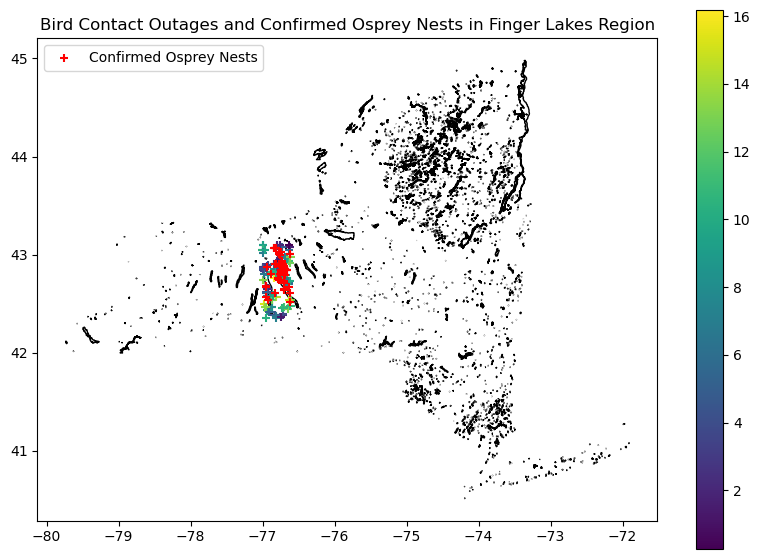

In [104]:
# fig = plt.subplots(subplot_kw={'aspect':'equal'}) # figsize=(12,10)
base = map_data.plot(color='white', edgecolor='black', figsize=(10,7))
osprey_nests_gdf.plot(marker = "+", column='nearest_waterbody_distance_km', k=5, legend=True, ax=base)
nests.plot(marker = "+", k=5, legend=True, ax=base, color = "red", label = "Confirmed Osprey Nests")
plt.title("Bird Contact Outages and Confirmed Osprey Nests in Finger Lakes Region")
plt.legend(loc = 'upper left')

Text(0.5, 0, 'Distance to Water (km)')

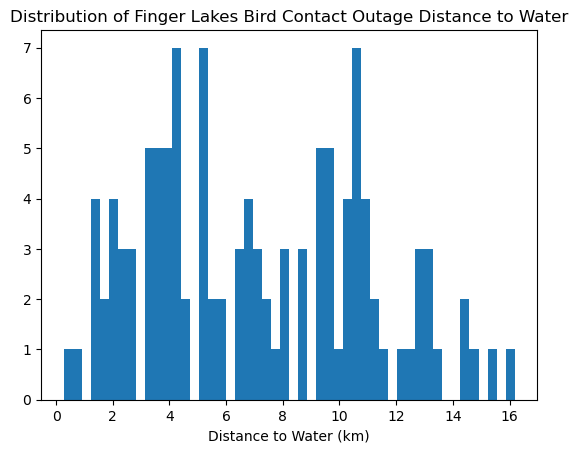

In [105]:
plt.hist(osprey_nests_gdf["nearest_waterbody_distance_km"], bins = 50)
plt.title("Distribution of Finger Lakes Bird Contact Outage Distance to Water")
plt.xlabel("Distance to Water (km)")

# Spatial AutocorrelatioN Analysis

In [106]:
df = osprey_nests_gdf
df = df.drop_duplicates(subset=['nearest_waterbody_distance_km', "geometry"])
df

,CauseDesc,Division,OPCO,faultlatitude,faultlongitude,CustomerCount,CircuitVoltage,geometry,nearest_waterbody_idx,nearest_waterbody_distance_km
39,Animal - Bird Contact,Geneva,NYSEG,42.845515,-76.995359,4.0,4800.0,POINT (-76.99536 42.84551),383.0,4.115398
44,Animal - Bird Contact,Geneva,NYSEG,42.940546,-76.771364,19.0,4800.0,POINT (-76.77136 42.94055),290.0,3.763633
46,Animal - Bird Contact,Auburn,NYSEG,42.712953,-76.659769,4.0,4800.0,POINT (-76.65977 42.71295),339.0,5.686334
60,Animal - Bird Contact,Sodus,RGE,43.078599,-76.625567,16.0,12470.0,POINT (-76.62557 43.07860),275.0,1.753066
96,Animal - Bird Contact,Geneva,NYSEG,42.854254,-76.735058,75.0,4800.0,POINT (-76.73506 42.85425),382.0,1.405215
...,...,...,...,...,...,...,...,...,...,...
6286,Animal - Bird Contact,Auburn,NYSEG,42.851145,-76.687716,19.0,4800.0,POINT (-76.68772 42.85115),382.0,4.239697
6291,Animal - Bird Contact,Geneva,NYSEG,42.666487,-76.946402,1.0,34500.0,POINT (-76.94640 42.66649),381.0,4.318541
6292,Animal - Bird Contact,Geneva,NYSEG,42.878069,-76.800924,11.0,12470.0,POINT (-76.80092 42.87807),290.0,4.036047
6298,Animal - Bird Contact,Sodus,RGE,43.096071,-76.629801,1.0,12470.0,POINT (-76.62980 43.09607),275.0,0.268357


In [107]:
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'r'

/var/folders/24/6ckwcq6s11dcd62_z_1k97_h0000gp/T/ipykernel_20253/1595884902.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq =  lps.weights.Queen.from_dataframe(df)


In [108]:
y = df['nearest_waterbody_distance_km']
ylag = lps.weights.lag_spatial(wq, y)

In [109]:
ylagq5 = mc.Quantiles(ylag, k=5)

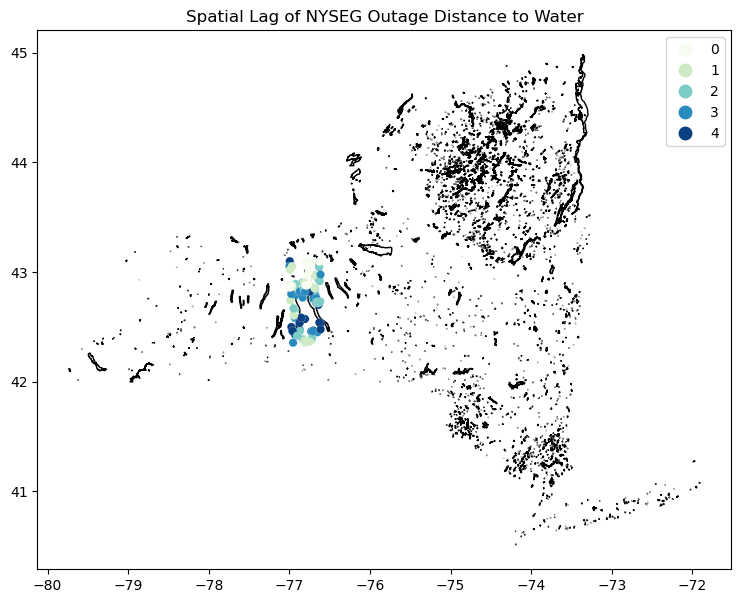

In [110]:
base = map_data.plot(color='white', edgecolor='black', figsize=(10,7))
# f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=base, \
        edgecolor='white', legend=True)
# ax.set_axis_off()
plt.title("Spatial Lag of NYSEG Outage Distance to Water")
plt.show()

/Users/ZhongxuanChen/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


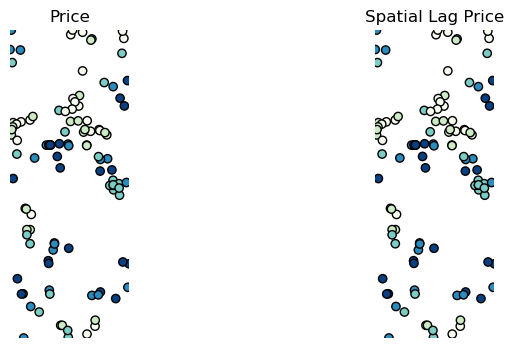

In [111]:
df['lag_median_pri'] = ylag
f,ax = plt.subplots(1,2,figsize=(2.16*4,4))
df.plot(column='nearest_waterbody_distance_km', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=5, cmap='GnBu')
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Price")
df.plot(column='nearest_waterbody_distance_km', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=5)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Spatial Lag Price")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

# Global Autocorrelation

In [112]:
wq.transform = 'r'
y = df['nearest_waterbody_distance_km']

In [113]:
np.random.seed(12345)
mi = esda.Moran(y, wq)
mi.I

0.5936254902528999

/var/folders/24/6ckwcq6s11dcd62_z_1k97_h0000gp/T/ipykernel_20253/2386594959.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(mi.sim, shade=True)
/Users/ZhongxuanChen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ZhongxuanChen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, "Moran's I")

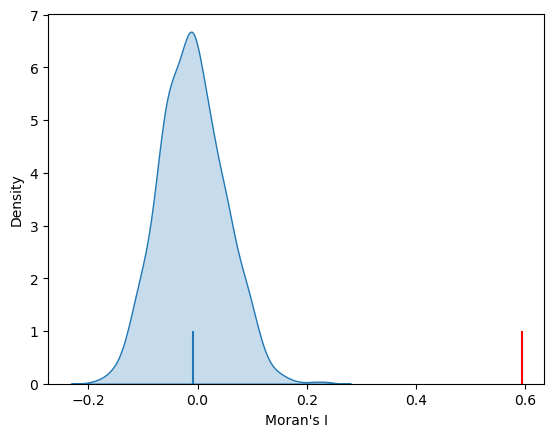

In [114]:
import seaborn as sbn
sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 1, color='r')
plt.vlines(mi.EI, 0,1)
plt.xlabel("Moran's I")

In [115]:
mi.p_sim

0.001

# Local Autocorrelation: Hot Spots, Cold Spots, and Spatial Outliers¶

In [116]:
wq.transform = 'r'
lag_price = lps.weights.lag_spatial(wq, df['nearest_waterbody_distance_km'])

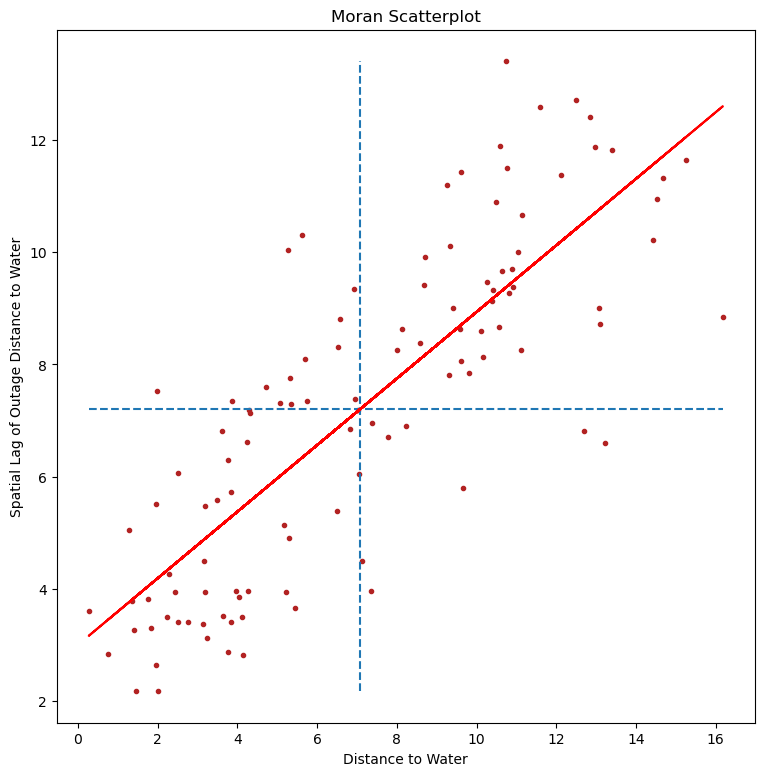

In [117]:
price = df['nearest_waterbody_distance_km']
b, a = np.polyfit(price, lag_price, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(price, lag_price, '.', color='firebrick')

 # dashed vert at mean of the price
plt.vlines(price.mean(), lag_price.min(), lag_price.max(), linestyle='--')
 # dashed horizontal at mean of lagged price
plt.hlines(lag_price.mean(), price.min(), price.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(price, a + b*price, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Outage Distance to Water')
plt.xlabel('Distance to Water')
plt.show()

In [118]:
li = esda.moran.Moran_Local(y, wq)

In [119]:
li_q = li.q

In [120]:
sig = 1 * (li.p_sim < 0.05)
hotspot = 1 * (sig * li.q==1)
coldspot = 3 * (sig * li.q==3)
doughnut = 2 * (sig * li.q==2)
diamond = 4 * (sig * li.q==4)
spots = hotspot + coldspot + doughnut + diamond
spots

array([0, 3, 0, 0, 3, 0, 3, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 3, 0, 0,
       0, 0, 0, 3, 1, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 3, 0, 0, 3, 0, 0, 1, 3, 3, 0, 0, 0,
       3, 0, 0, 3, 3, 1, 0, 0, 3, 3, 3, 0, 4, 1, 0, 3, 0, 0, 1, 1, 0, 0,
       4, 3, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 3])

In [121]:
spots = hotspot + coldspot + doughnut + diamond
spots
spot_labels = ['0 NS', '1 I', '2 II', '3 III', '4 IV']
labels = [spot_labels[i] for i in spots]

/Users/ZhongxuanChen/opt/anaconda3/lib/python3.9/site-packages/geopandas/plotting.py:314: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  collection = ax.scatter(x, y, vmin=vmin, vmax=vmax, cmap=cmap, **kwargs)


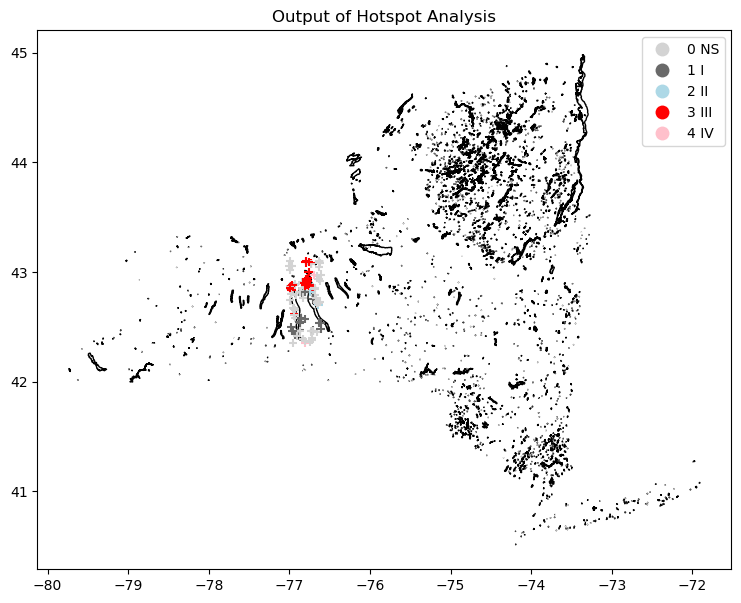

In [122]:
from matplotlib import colors
base = map_data.plot(color='white', edgecolor='black', figsize=(10,7))
hmap = colors.ListedColormap(['lightgrey', 'dimgray', 'lightblue', 'red', 'pink'])

# f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(marker = "+", column='cl', categorical=True, \
        k=2, cmap=hmap, ax=base, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Output of Hotspot Analysis")
plt.show()

# Validation

In [123]:
df["labels"] = labels
df

/Users/ZhongxuanChen/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,CauseDesc,Division,OPCO,faultlatitude,faultlongitude,CustomerCount,CircuitVoltage,geometry,nearest_waterbody_idx,nearest_waterbody_distance_km,lag_median_pri,labels
39,Animal - Bird Contact,Geneva,NYSEG,42.845515,-76.995359,4.0,4800.0,POINT (-76.99536 42.84551),383.0,4.115398,3.492373,0 NS
44,Animal - Bird Contact,Geneva,NYSEG,42.940546,-76.771364,19.0,4800.0,POINT (-76.77136 42.94055),290.0,3.763633,2.873140,3 III
46,Animal - Bird Contact,Auburn,NYSEG,42.712953,-76.659769,4.0,4800.0,POINT (-76.65977 42.71295),339.0,5.686334,8.090265,0 NS
60,Animal - Bird Contact,Sodus,RGE,43.078599,-76.625567,16.0,12470.0,POINT (-76.62557 43.07860),275.0,1.753066,3.820594,0 NS
96,Animal - Bird Contact,Geneva,NYSEG,42.854254,-76.735058,75.0,4800.0,POINT (-76.73506 42.85425),382.0,1.405215,3.272096,3 III
...,...,...,...,...,...,...,...,...,...,...,...,...
6286,Animal - Bird Contact,Auburn,NYSEG,42.851145,-76.687716,19.0,4800.0,POINT (-76.68772 42.85115),382.0,4.239697,6.623810,0 NS
6291,Animal - Bird Contact,Geneva,NYSEG,42.666487,-76.946402,1.0,34500.0,POINT (-76.94640 42.66649),381.0,4.318541,7.142851,0 NS
6292,Animal - Bird Contact,Geneva,NYSEG,42.878069,-76.800924,11.0,12470.0,POINT (-76.80092 42.87807),290.0,4.036047,3.851527,3 III
6298,Animal - Bird Contact,Sodus,RGE,43.096071,-76.629801,1.0,12470.0,POINT (-76.62980 43.09607),275.0,0.268357,3.600179,0 NS


In [124]:
df_hotspot = df[df["labels"] == "1 I"]
len(df_hotspot)

21

In [125]:
df_doughnut = df[df["labels"] == "2 II"]
len(df_doughnut)

2

In [126]:
df_coldspot= df[df["labels"] == "3 III"]
len(df_coldspot)

22

In [127]:
df_diamond = df[df["labels"] == "4 IV"]
len(df_diamond)

2

In [128]:
df_ns= df[df["labels"] == "0 NS"]
len(df_ns)

63

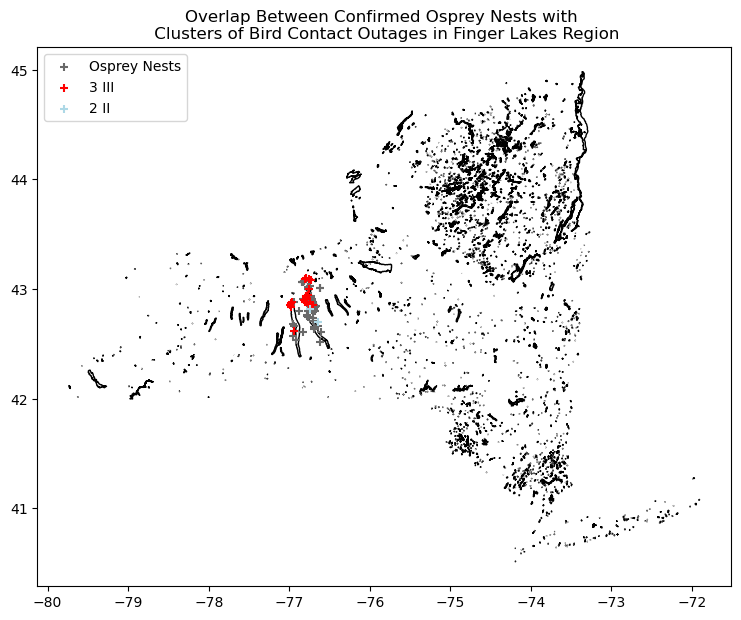

In [129]:
base = map_data.plot(color='white', edgecolor='black', figsize=(10,7))
nests.plot(ax=base, marker = "+", k=5, legend=True, color = 'dimgray', label = "Osprey Nests")
df_coldspot.plot(ax=base, marker = "+", k=5, legend=True, color = "red", label = "3 III")
df_doughnut.plot(ax=base, marker = "+", k=5, legend=True, color = "lightblue", label = "2 II")
# df_diamond.plot(ax=base, marker = "+", k=5, legend=True, color = "pink", label = "4 IV")
plt.title("Overlap Between Confirmed Osprey Nests with \n Clusters of Bird Contact Outages in Finger Lakes Region")
plt.legend(loc = 'upper left')


<Axes: >

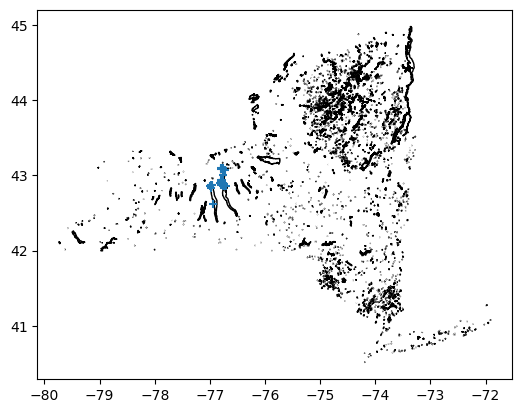

In [130]:
base = map_data.plot(color='white', edgecolor='black')
df_coldspot.plot(ax=base, marker = "+", k=5, legend=True)

<Axes: >

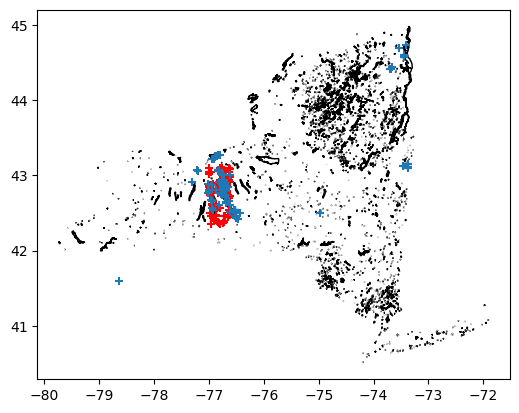

In [131]:
base = map_data.plot(color='white', edgecolor='black')

df.plot(ax=base, marker = "+", k=5, legend=True,  color = "red")
nests_gdf.plot(ax=base, marker = "+", k=5, legend=True)

<Axes: >

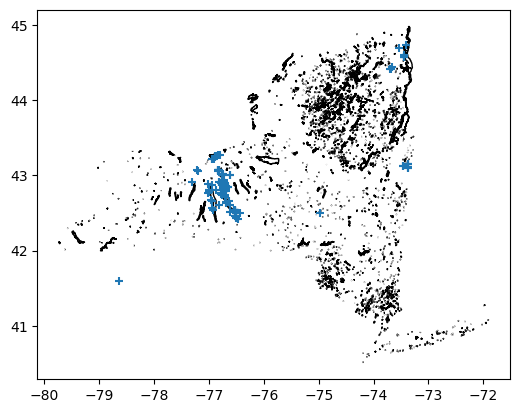

In [132]:
base = map_data.plot(color='white', edgecolor='black')
nests_gdf.plot(ax=base, marker = "+", k=5, legend=True)